In [55]:
# Introduction

import pandas as pd
import matplotlib.pyplot as plt

# Traffic Behavior Dataset
traffic = pd.read_csv("../dataset/traffic_sao_paulo.csv", sep = ';')
traffic.head(5)
traffic.tail(5)

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
130,23,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,"17,8"
131,24,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,"18,1"
132,25,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,"17,7"
133,26,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,"17,4"
134,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"12,1"


In [56]:
# Traffic Behavior Dataset
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',', '.')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)
print(traffic['Slowness in traffic (%)'].describe())

count    135.000000
mean      10.051852
std        4.363243
min        3.400000
25%        7.400000
50%        9.000000
75%       11.850000
max       23.400000
Name: Slowness in traffic (%), dtype: float64


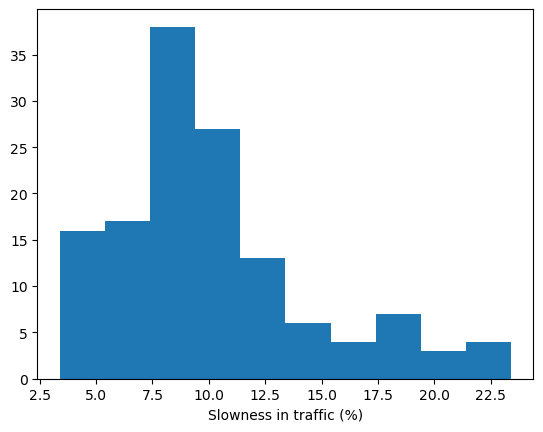

In [57]:
# Slowness in Traffic
plt.hist(traffic['Slowness in traffic (%)'])
plt.xlabel('Slowness in traffic (%)')
plt.show()

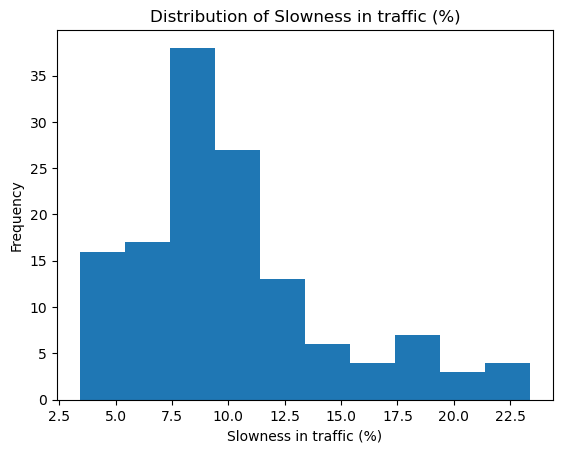

In [58]:
# Pandas Visualization Methods
plt.title('Distribution of Slowness in traffic (%)')
traffic['Slowness in traffic (%)'].plot.hist()
plt.xlabel('Slowness in traffic (%)')
plt.show()

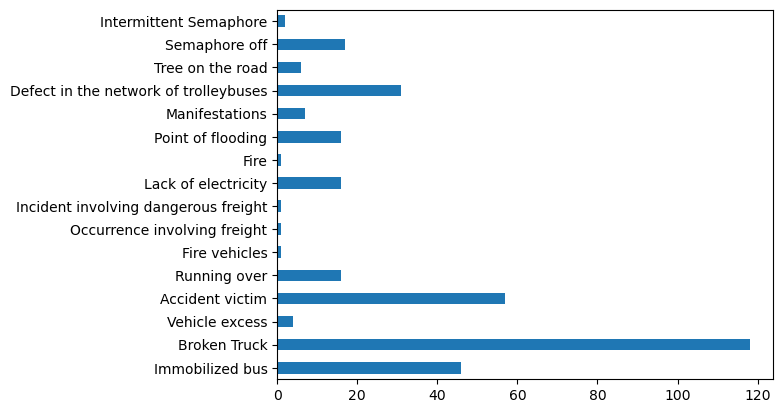

In [59]:
# Frequency of Incidents
incidents = traffic.drop(['Hour (Coded)', 'Slowness in traffic (%)'], axis=1)
incidents.sum().plot.barh()
plt.show()


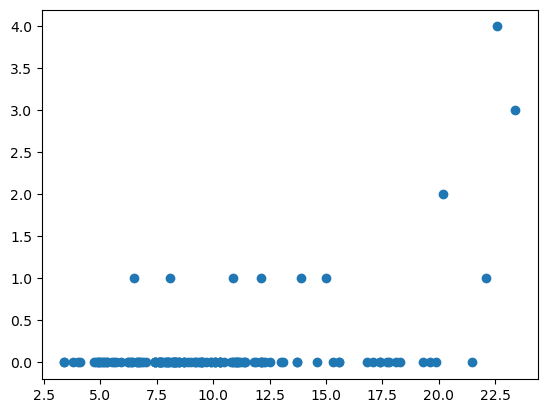

In [60]:
# Correlations with Traffic Slowness
plt.scatter(traffic['Slowness in traffic (%)'], traffic['Lack of electricity'])
# traffic.plot.scatter(x = 'Slowness in traffic (%)', y = 'Lack of electricity')
plt.show()

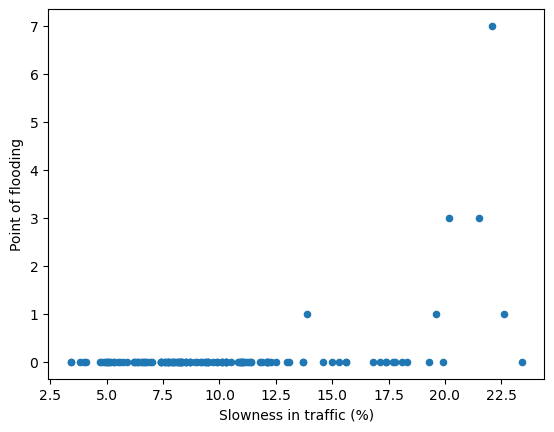

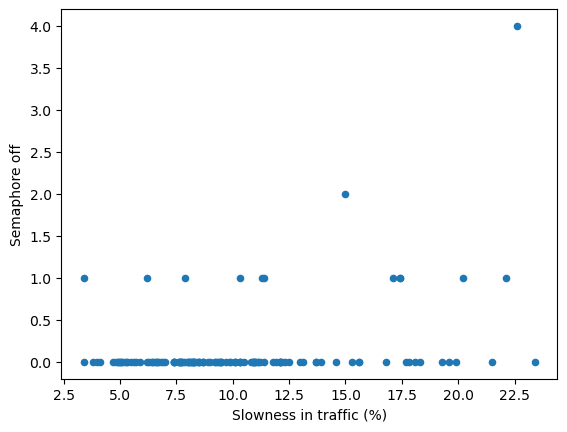

In [61]:
traffic.plot.scatter(x = 'Slowness in traffic (%)', y = 'Point of flooding')
plt.show()
traffic.plot.scatter(x = 'Slowness in traffic (%)', y = 'Semaphore off')
plt.show()

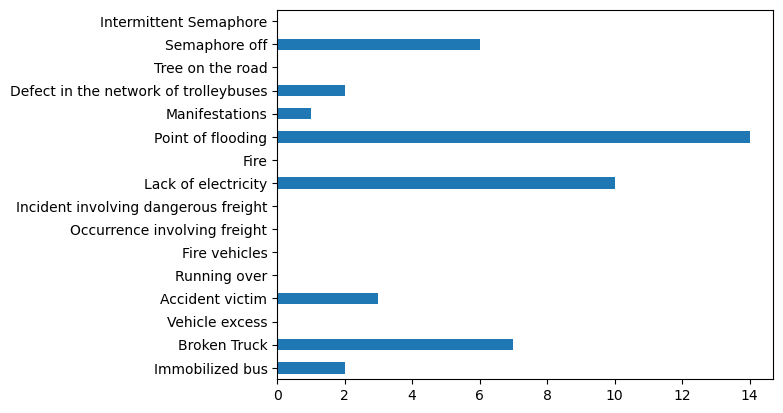

In [65]:
# Traffic Slowness Over 20%
traffic = pd.read_csv('../dataset/traffic_sao_paulo.csv', sep=';')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',', '.')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)

slowness_20_or_more = traffic[traffic['Slowness in traffic (%)'] >= 20]
slowness_20_or_more = slowness_20_or_more.drop(['Hour (Coded)', 'Slowness in traffic (%)'], axis = 1)
incident_frequencies = slowness_20_or_more.sum()

incident_frequencies.plot.barh()
plt.show()


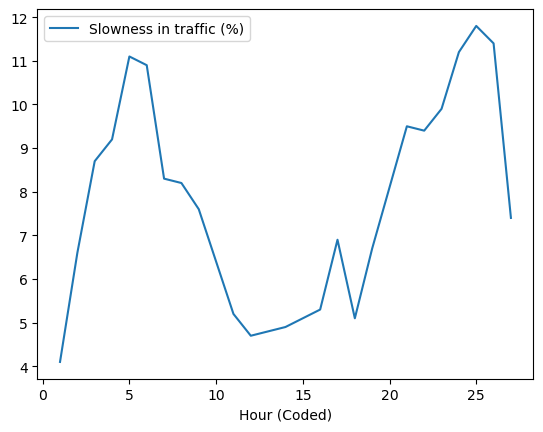

In [66]:
# How Traffic Slowness Change
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
traffic_per_day = {}

for i, day in zip(range(0, 135, 27), days):
    each_day_traffic = traffic[i:i+27]
    traffic_per_day[day] = each_day_traffic

traffic_per_day['Monday'].plot.line(x='Hour (Coded)', y='Slowness in traffic (%)')
plt.show()

